# Textcompletion in the Style of Taylor Swift with the help of a LLM (Nano GPT)

In this Project I want to build a LLM (Transformer based) similar to ChatGPT, so that i have a text generation in the Style of Taylor Swift. For this I am using the Video "Let's build GPT: from scratch, in code, spelled out." from the Tesla and openAI Engineer Andrej Karpathy as an example project. \
https://www.youtube.com/watch?v=kCc8FmEb1nY&t=8s \
https://github.com/karpathy/nanoGPT  

This Project is a University Project for the lecture "Artificial Intelligence and Big Data Analytics".

## Project Structure:
* [1. Project Structure](#chapter1)
* [2. Data Gathering](#chapter2)
    * [2.1 Finding a suitable Dataset](#section_2_1)
* [3. EDA](#chapter3)
* [4. Feature Engineering](#chapter4)
    * [4.1 Tokenizing](#section_4_1)
    * [4.2 Preparing for Training](#section_4_2)
* [5. Training of a Model](#chapter5)
    * [5.1 Specialization: Versions of improving the weights](#section_5_1)
* [6. Evaluation of the Model](#chapter6)

## Data gathering <a class="anchor" id="chapter2"></a>

To train a LLM to answer in the Style of Taylor Swift songs, there must be the lyrics of all of her songs to get a suitable ammount of training data. In this chapter the data gathering takes place.

### Finding a suitable Dataset <a class="anchor" id="section_2_1"></a>

Before building my own dataset, I wanted to have a look if there already are datasets for my purpose on the Internet. Looking on Kaggle, I found multiple Datasets on Taylor Swift lyrics, but most of them were not well maintained (did not have the latest album), nor were they free of dublicates (most datasets just listed all Taylor Swift songs, so all covers and different song versions would be doubled). This could be fixed by me with some effort, but then i found this Dataset by the User "Madeline Clarc" https://www.kaggle.com/madroscla:

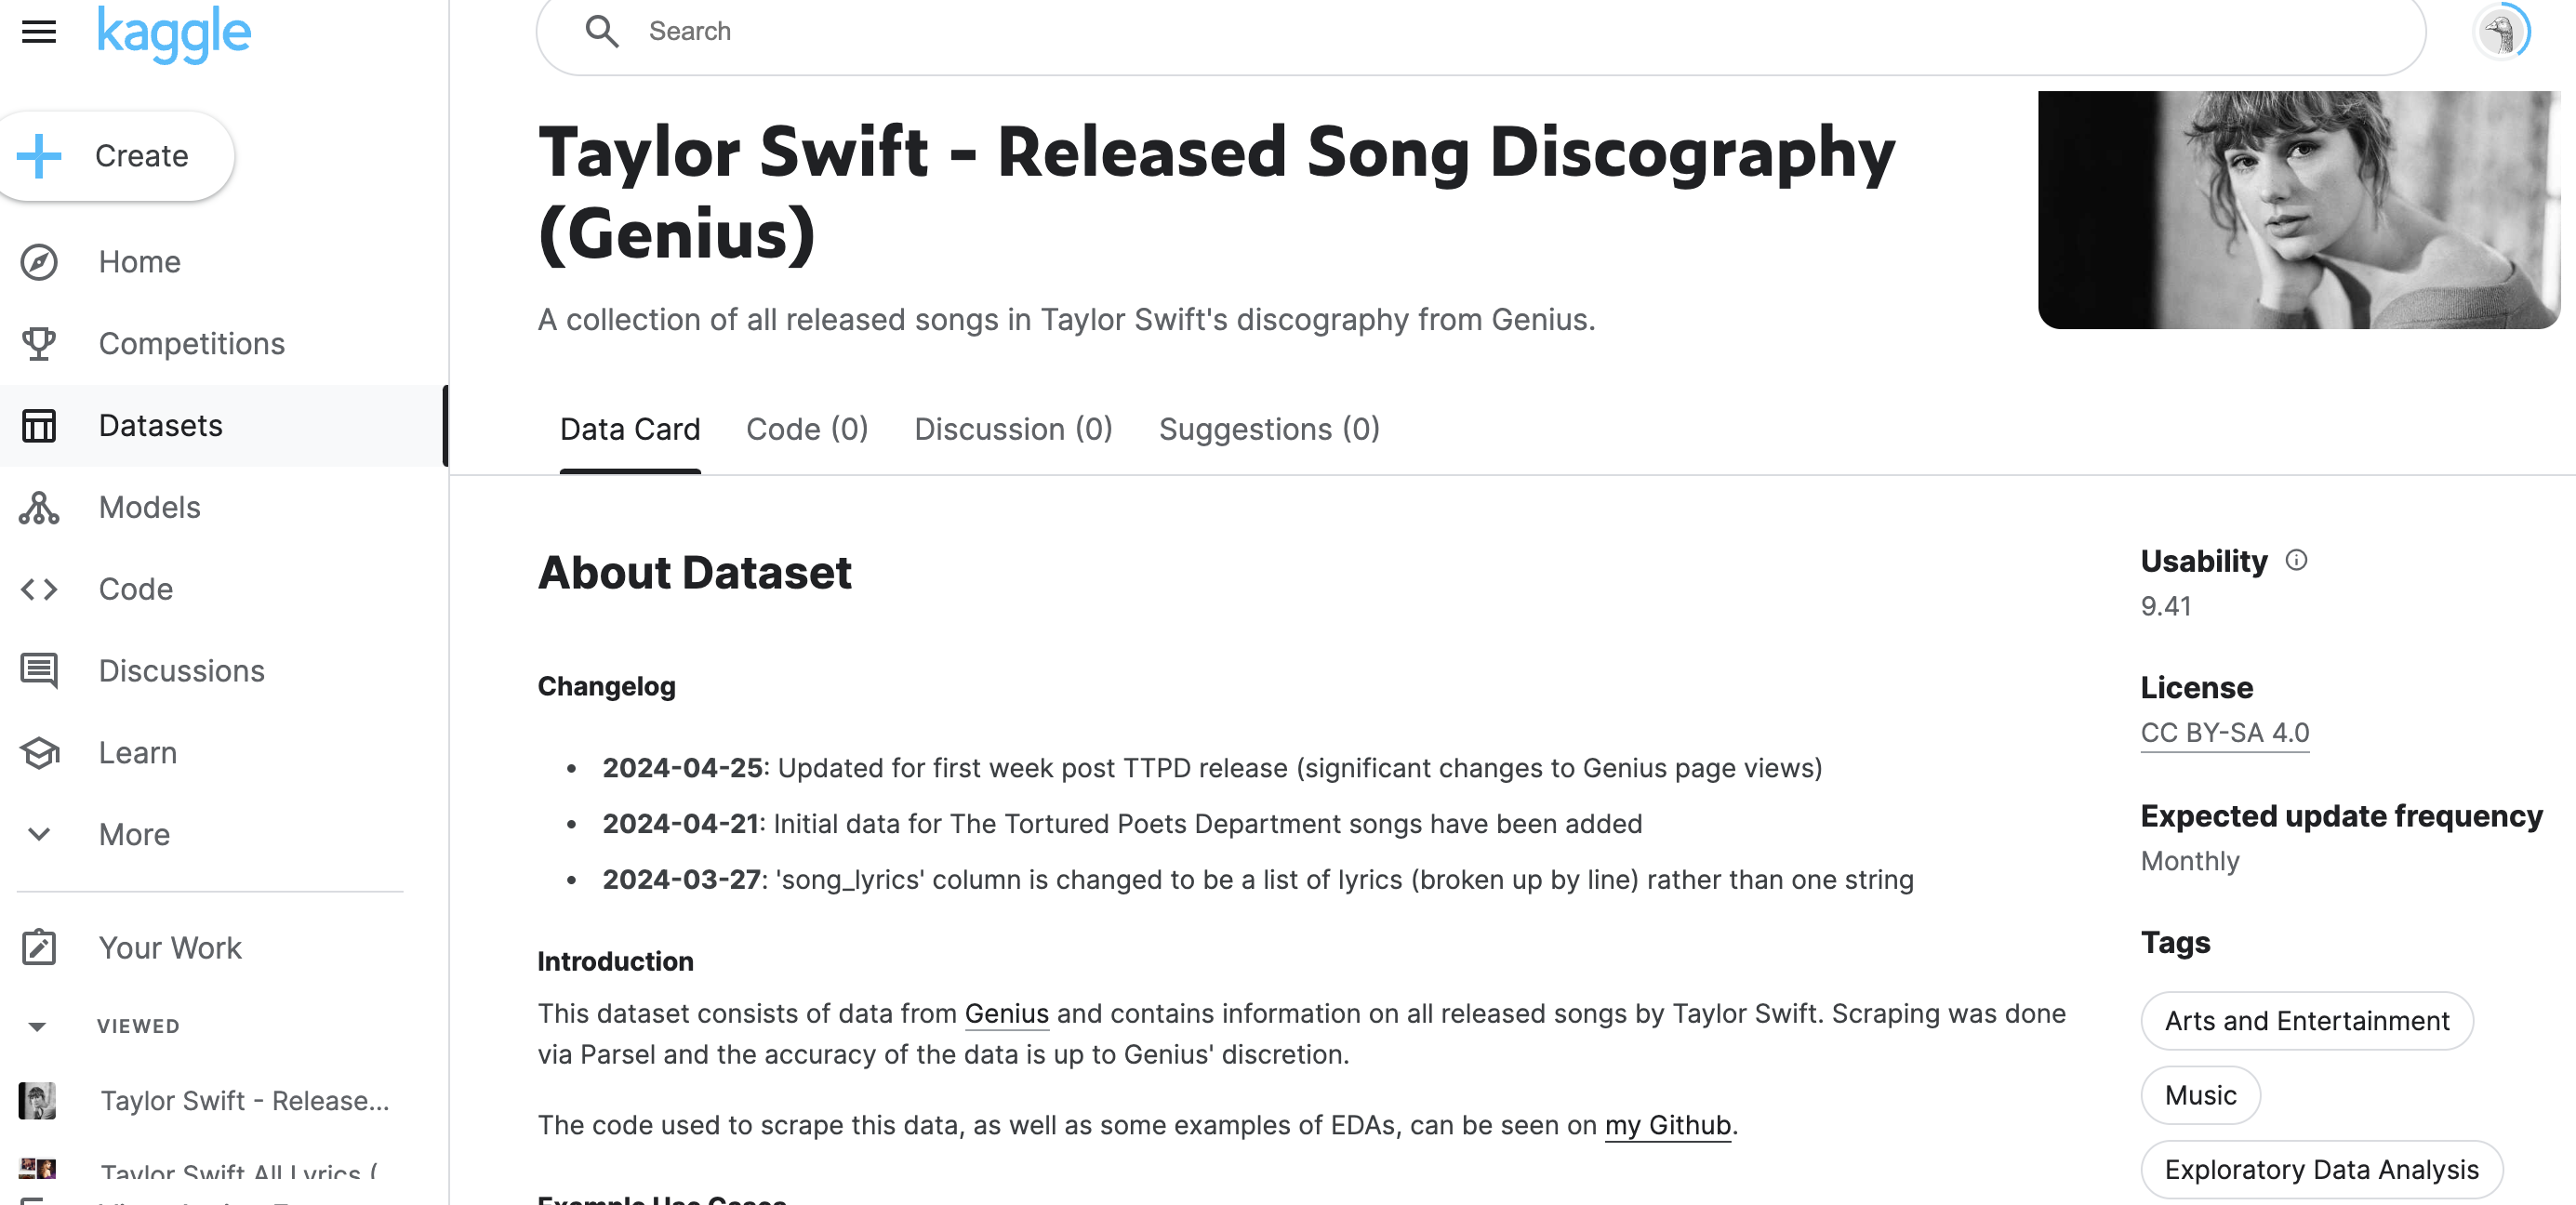
*Source: [Kaggle.com](https://www.kaggle.com/datasets/madroscla/taylor-swift-released-song-discography-genius)*

As you can see, the Dataset was recently updated and the latest Album "The Tortured Poets Department" Songs were added. In addition to that, the dataset has a 9.41 Usability Rating which is perfect for my needs and the code of the Data Gathering was linked in the creators Github, so you can see how the data was assembled form the Genius API.

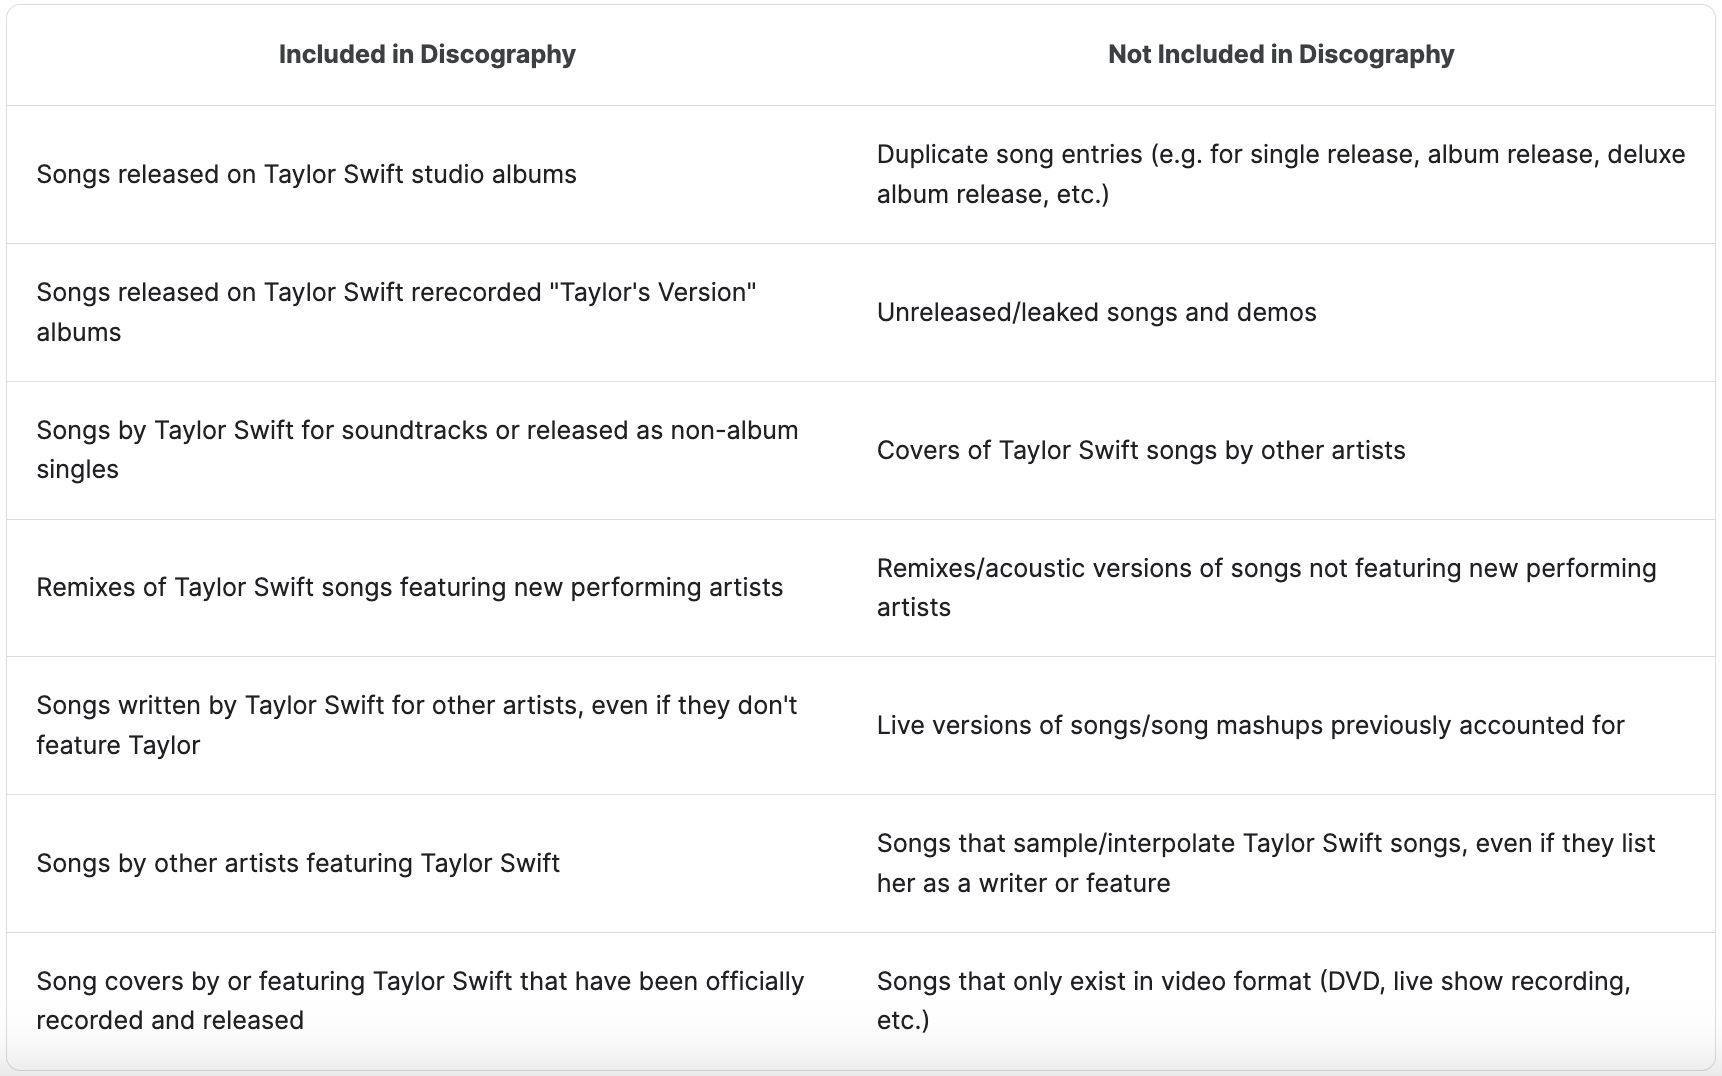
*Source: [Kaggle.com](https://www.kaggle.com/datasets/madroscla/taylor-swift-released-song-discography-genius)*

Furthermore, the creator of this dataset made a table of what is included in the dataset and what is not. It only includes Songs or covers by or featuring Taylor Swift that are officially released without any duplicates or covers of other artists. So this dataset should be perfect for the given task, lets have a better look at it in the next chapter:

## EDA <a class="anchor" id="chapter3"></a>

So lets have a look at the chosen dataset:

In [1]:
import pandas as pd

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("Data/ts_discography_released.csv")
df.head()

,album_title,album_url,category,album_track_number,song_title,song_url,song_artists,song_release_date,song_page_views,song_lyrics,song_writers,song_producers,song_tags
0,Taylor Swift,https://genius.com/albums/Taylor-Swift/Taylor-...,Taylor Swift,1,Tim McGraw,https://genius.com/Taylor-swift-tim-mcgraw-lyrics,['Taylor Swift'],2006-06-19,252000,"['He said the way my blue eyes shined', 'Put t...","['Liz Rose', 'Taylor Swift']",['Nathan Chapman'],"['Country', 'In English', 'USA', 'Country Rock..."
1,Taylor Swift,https://genius.com/albums/Taylor-Swift/Taylor-...,Taylor Swift,2,Picture to Burn,https://genius.com/Taylor-swift-picture-to-bur...,['Taylor Swift'],2006-10-24,266300,"[""State the obvious, I didn't get my perfect f...","['Liz Rose', 'Taylor Swift']",['Nathan Chapman'],"['Pop', 'Rock', 'Country', 'In English', 'USA'..."
2,Taylor Swift,https://genius.com/albums/Taylor-Swift/Taylor-...,Taylor Swift,3,Teardrops On My Guitar,https://genius.com/Taylor-swift-teardrops-on-m...,['Taylor Swift'],2006-10-24,235200,"['Drew looks at me', ""I fake a smile so he won...","['Liz Rose', 'Taylor Swift']",['Nathan Chapman'],"['Country', 'In English', 'USA', 'Adult Contem..."
3,Taylor Swift,https://genius.com/albums/Taylor-Swift/Taylor-...,Taylor Swift,4,A Place In This World,https://genius.com/Taylor-swift-a-place-in-thi...,['Taylor Swift'],2006-10-24,79400,"[""I don't know what I want, so don't ask me"", ...","['Angelo Petraglia', 'Robert Ellis Orrall', 'T...",['Nathan Chapman'],"['Country', 'Pop', 'In English', 'USA', 'Teen ..."
4,Taylor Swift,https://genius.com/albums/Taylor-Swift/Taylor-...,Taylor Swift,5,Cold as You,https://genius.com/Taylor-swift-cold-as-you-ly...,['Taylor Swift'],2006-10-24,131800,"['You have a way of coming easily to me', 'And...","['Liz Rose', 'Taylor Swift']",['Nathan Chapman'],"['Country', 'Pop', 'In English', 'USA', 'Balla..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   album_title         354 non-null    object
 1   album_url           354 non-null    object
 2   category            358 non-null    object
 3   album_track_number  358 non-null    int64 
 4   song_title          358 non-null    object
 5   song_url            358 non-null    object
 6   song_artists        358 non-null    object
 7   song_release_date   358 non-null    object
 8   song_page_views     358 non-null    int64 
 9   song_lyrics         358 non-null    object
 10  song_writers        358 non-null    object
 11  song_producers      358 non-null    object
 12  song_tags           358 non-null    object
dtypes: int64(2), object(11)
memory usage: 36.5+ KB


Here we can see the first 5 entries of the dataset and some info about each column. We basically only need the song lyrics column, but this is a task for the feature engineering in the next chapter. First we will have to see if the data is plausible and how good the quality of the provided data is. To do this, lets check the following:
- see how many unique albums there are and list them (this is easily verifiable)
- see how many unique songs there are (check for duplicates)
- research if that number makes any sense
- look at the lyrics of some random songs and cross check them with online lyrics

Looking at the unique albums:

In [4]:
unique_df_album = df["album_title"].unique()
number_of_unique_entries = len(unique_df_album)
print("Number of unique album titles:", number_of_unique_entries)

Number of unique album titles: 55


This number seems too high, as Wikipedia states that Taylor Swift only has 11 studio und 4 live albums. \
https://en.wikipedia.org/wiki/Taylor_Swift_albums_discography \
So lets look at the entries:

In [5]:
print(unique_df_album)

['Taylor Swift' 'Fearless (Platinum Edition)'
 "Fearless (Taylor's Version)" 'Speak Now (Deluxe)'
 "Speak Now (Taylor's Version)" 'Red (Deluxe Version)'
 "Red (Taylor's Version)" '1989 (Deluxe)'
 "1989 (Taylor's Version) [Tangerine Edition]" 'reputation' 'Lover'
 'folklore (deluxe version)'
 'Christmas Tree Farm - 12" Single Picture Disc'
 'evermore (deluxe version)'
 'Carolina (From The Motion Picture "Where The Crawdads Sing")'
 'Midnights (3am Edition)' 'Midnights (The Late Night Edition)'
 "The More Red (Taylor's Version) Chapter"
 "The More Fearless (Taylor's Version) Chapter" 'The More Lover Chapter'
 'The Taylor Swift Holiday Collection - EP'
 'THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY'
 'Cats: Highlights From the Motion Picture Soundtrack' 'iTunes Essentials'
 'Hannah Montana: The Movie (Original Motion Picture Soundtrack)'
 'Fifty Shades Darker (Original Motion Picture Soundtrack)' 'Love Drunk'
 'NOW That’s What I Call Music! 94 [UK]' 'First Two Pages of Frankenstein'
 'How

Seeing all the album entries, we can confirm that all of the latest and main albums are indeed in the dataset. In addition to the main albums of Taylor Swift she also has songs that are part of other albums, e.g 'Hannah Montana: The Movie (Original Motion Picture Soundtrack), where she wrote and performed a movie Soundtrack. With this Information the number of 55 albums seems plausible now.

Now lets see if there really are no song duplicates:

In [6]:
unique_df_songs = df["song_title"].unique()
number_of_unique_songs = len(unique_df_songs)
print(number_of_unique_songs)

358


As we saw in the info about our dataframe, we have 358 entries in that column and because we dont want duplicates we now expect the same number. Now that we get this same number, we know that we dont have duplicates, but the number is higher than expected (https://www.dexerto.com/entertainment/how-many-songs-does-taylor-swift-have-2447963/ this article says she has 243 songs, excluding her latest album). \
So lets look at the list of songs:

In [7]:
print(unique_df_songs)

['Tim McGraw' 'Picture to Burn' 'Teardrops On My Guitar'
 'A Place In This World' 'Cold as You' 'The Outside'
 'Tied Together with a Smile' 'Stay Beautiful' "Should've Said No"
 "Mary's Song (Oh My My My)" 'Our Song' "I'm Only Me When I'm With You"
 'Invisible' 'A Perfectly Good Heart' 'Jump Then Fall' 'Untouchable'
 'Come In With the Rain' 'SuperStar' 'The Other Side Of The Door'
 'Fearless' 'Fifteen' 'Love Story' 'Hey Stephen' 'White Horse'
 'You Belong With Me' 'Breathe (Ft. Colbie Caillat)' 'Tell Me Why'
 "You're Not Sorry" 'The Way I Loved You' 'Forever & Always'
 'The Best Day' 'Change' "Fearless (Taylor's Version)"
 "Fifteen (Taylor's Version)" "Love Story (Taylor's Version)"
 "Hey Stephen (Taylor's Version)" "White Horse (Taylor's Version)"
 "You Belong With Me (Taylor's Version)"
 "Breathe (Taylor's Version) (Ft. Colbie Caillat)"
 "Tell Me Why (Taylor's Version)" "You're Not Sorry (Taylor's Version)"
 "The Way I Loved You (Taylor's Version)"
 "Forever & Always (Taylor's Versio

Exploring all these entries, we can see that some songs are from other artists and Taylor Swift is just a feature, as we already saw in the unique albums. Furthermore we see that there are indeed some duplicates, as some songs got recorded again as "Taylors Version", but the lyrics remain the same. We will neglect the impact of these duplicates for now but also remember that there are these occurances. The number of 358 Songs with songs and appearances on other albums seems reasonable now.

Now to see if the lyrics are right, we will have a look at a single chosen song from the dataset und see if is right:

In [8]:
example_song_df = df.loc[df['song_title'] == "Wildest Dreams"]
for index, row in example_song_df.iterrows():
    print(f"Lyrics for index {index}: {row['song_lyrics']}\n")

Lyrics for index 154: ['He said, "Let\'s get out of this town', 'Drive out of the city, away from the crowds"', 'I thought, "Heaven can\'t help me now"', 'Nothing lasts forever', 'But this is gonna take me down', "He's so tall and handsome as hell", "He's so bad, but he does it so well", 'I can see the end as it begins', 'My one condition is', "Say you'll remember me", "Standin' in a nice dress", "Starin' at the sunset, babe", 'Red lips and rosy cheeks', "Say you'll see me again", "Even if it's just in your", 'Wildest dreams, ah, ha', 'Wildest dreams, ah, ha', 'I said, "No one has to know what we do"', 'His hands are in my hair, his clothes are in my room', 'And his voice is a familiar sound', "Nothin' lasts forever", "But this is gettin' good now", "He's so tall and handsome as hell", "He's so bad, but he does it so well", "And when we've had our very last kiss", 'My last request is', "Say you'll remember me", "Standin' in a nice dress", "Starin' at the sunset, babe", 'Red lips and ro

Comparing this to the Lyrics of the Song "Wildest Dreams" by Taylor Swift (or just listening to it), we can confirm that this is indeed the right lyrics. We can also see that the the lyrics is already split up in itself and there are sometimes backslashes before an apostrophe. This is very important to see for the next step, where we modify the lyrics so that we can use them to train a model.

Ideen: Wordcloud, Wortanzahl vergleichen mit Shakespeare, besser strukturieren mit Unterüberschriften was hier gemacht wurde
frage nach Wordcloud, wo? eigentlich schon im 4. und nicht 3. oder?

## Feature Engineering

Now to use the Taylor Swift lyrics, we need to build a .txt file to train our Transformer later on.

In [9]:
# Convert song lyrics from list format to plain text
df['song_lyrics'] = df['song_lyrics'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else x)

# Create a text file with song titles and lyrics
output_text = ""
for index, row in df.iterrows():
    output_text += f"Title: {row['song_title']}\n\n{row['song_lyrics']}\n\n"

# Define the output file path
output_file_path = 'Data/taylor_swift_lyrics.txt'

# Write the text to a file
with open(output_file_path, 'w') as file:
    file.write(output_text)

print("Text file created at:", output_file_path)

Text file created at: Data/taylor_swift_lyrics.txt


To see, if the .txt file creation was a success, we will now open it and have a look at it. Also we will print out the lenght of the dataset in characters, to evaluate if it is suitable to train the Nano GPT:

In [11]:
with open(output_file_path, 'r', encoding= 'utf-8') as f:
    text = f.read()

In [12]:
print("dataset length in characters: ", len(text))

dataset length in characters:  665503


In [16]:
# to see if the text is now in order and as we want it to be, lets look at the first 3000 characters:
print(text[:3000])

Title: Tim McGraw

He said the way my blue eyes shined Put those Georgia stars to shame that night I said, "That's a lie" Just a boy in a Chevy truck That had a tendency of gettin' stuck On backroads at night And I was right there beside him all summer long And then the time we woke up to find that summer gone But when you think Tim McGraw I hope you think my favorite song The one we danced to all night long The moon like a spotlight on the lake When you think happiness I hope you think that little black dress Think of my head on your chest And my old faded blue jeans When you think Tim McGraw I hope you think of me September saw a month of tears And thankin' God that you weren't here To see me like that But in a box beneath my bed Is a letter that you never read From three summers back It's hard not to find it all a little bittersweet And lookin' back on all of that, it's nice to believe When you think Tim McGraw I hope you think my favorite song The one we danced to all night long Th

Now that the .txt file is ready to work with, we will have a look at all the unique characters used in the text. This is our vocabulary for the Transformer:

In [17]:
#first we need a set to see all unique characters, then a list to give it an arbitrary order
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !"#&'()+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZ[]abcdefghijklmnopqrstuvwxyzÉáãçéíóõе​‎—‘’“” 
98


We can see, that we have more unique characters than the shakespeare dataset (98 vs 65), due to some special characters. But these will be neglectes, because they are not very common and will hopefuly not cause any trouble.

### Tokenizing <a class="anchor" id="section_4_1"></a>

We will (for now) use a simple tokenizer with character by character mapping:

In [18]:
stoi = { ch:i for i, ch in enumerate(chars) }
itos = { i:ch for i, ch in enumerate(chars) }
#encoder: take a string, output a list of integers
encode = lambda s: [stoi[c] for c in s] 
#decoder: take a list of integers, output a string
decode = lambda l: ''.join([itos[i] for i in l])

In [19]:
#encoder and decoder test:
print(encode("I love Taylor Swift"))
print(decode(encode("I love Taylor Swift")))

[35, 1, 66, 69, 76, 59, 1, 46, 55, 79, 66, 69, 72, 1, 45, 77, 63, 60, 74]
I love Taylor Swift


### Preparing for Training <a class="anchor" id="section_4_2"></a>

To use the text data for Model Training, we will put it into a tensor from pytorch, a better data structure (basically an array of all tokens).

In [22]:
import torch
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000]) #the first 1000 characters in the tensor

torch.Size([665503]) torch.int64
tensor([46, 63, 74, 66, 59, 24,  1, 46, 63, 67,  1, 39, 57, 33, 72, 55, 77,  0,
         0, 34, 59,  1, 73, 55, 63, 58,  1, 74, 62, 59,  1, 77, 55, 79,  1, 67,
        79,  1, 56, 66, 75, 59,  1, 59, 79, 59, 73,  1, 73, 62, 63, 68, 59, 58,
         1, 42, 75, 74,  1, 74, 62, 69, 73, 59,  1, 33, 59, 69, 72, 61, 63, 55,
         1, 73, 74, 55, 72, 73,  1, 74, 69,  1, 73, 62, 55, 67, 59,  1, 74, 62,
        55, 74,  1, 68, 63, 61, 62, 74,  1, 35,  1, 73, 55, 63, 58, 10,  1,  3,
        46, 62, 55, 74,  6, 73,  1, 55,  1, 66, 63, 59,  3,  1, 36, 75, 73, 74,
         1, 55,  1, 56, 69, 79,  1, 63, 68,  1, 55,  1, 29, 62, 59, 76, 79,  1,
        74, 72, 75, 57, 65,  1, 46, 62, 55, 74,  1, 62, 55, 58,  1, 55,  1, 74,
        59, 68, 58, 59, 68, 57, 79,  1, 69, 60,  1, 61, 59, 74, 74, 63, 68,  6,
         1, 73, 74, 75, 57, 65,  1, 41, 68,  1, 56, 55, 57, 65, 72, 69, 55, 58,
        73,  1, 55, 74,  1, 68, 63, 61, 62, 74,  1, 27, 68, 58,  1, 35,  1, 77,
       

Now for the training we also need to split the dataset into train and validation data, to check for overfitting:

In [23]:
#setting the traing data to 90% of the data
n = int(0.9*len(data)) 
train_data = data[:n]
val_data = data[n:]

In addition to that, Transformers get "chunks" of data, and not all of the data at once. This will be determined in the block size. The +1 is important because this will act as a sort of mapping function, and for that we have 1 more y than x:

In [24]:
block_size = 8
train_data[:block_size+1]

tensor([46, 63, 74, 66, 59, 24,  1, 46, 63])

In [26]:
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target is: {target}")

when input is tensor([46]) the target is: 63
when input is tensor([46, 63]) the target is: 74
when input is tensor([46, 63, 74]) the target is: 66
when input is tensor([46, 63, 74, 66]) the target is: 59
when input is tensor([46, 63, 74, 66, 59]) the target is: 24
when input is tensor([46, 63, 74, 66, 59, 24]) the target is: 1
when input is tensor([46, 63, 74, 66, 59, 24,  1]) the target is: 46
when input is tensor([46, 63, 74, 66, 59, 24,  1, 46]) the target is: 63


The last step now is to get a randomised batch for the training of the Transformer:

In [27]:
#how many independent sequences will be processed in parallel:
batch_size = 4 
#maximum context length for prediction:
block_size = 8

def get_batch(split):
    #generate small batches of data inputs x and targets y:
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size]for i in ix])
    y = torch.stack([data[i+1:i+block_size+1]for i in ix])
    return x,y

xb, yb = get_batch('train')
print('inputs (our x):')
print(xb.shape)
print(xb)
print('targets (our y):')
print(yb.shape)
print(yb)

print('--------')

for b in range(batch_size): #batch dimension
    for t in range(block_size): #time dimension
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")

inputs (our x):
torch.Size([4, 8])
tensor([[ 1, 55, 68, 58,  1, 69, 75, 72],
        [72, 59, 73, 62,  1, 69, 68,  1],
        [ 1, 77, 62, 59, 68,  1, 35,  6],
        [ 1, 55, 73,  1, 74, 62, 59,  1]])
targets (our y):
torch.Size([4, 8])
tensor([[55, 68, 58,  1, 69, 75, 72,  1],
        [59, 73, 62,  1, 69, 68,  1, 74],
        [77, 62, 59, 68,  1, 35,  6, 67],
        [55, 73,  1, 74, 62, 59,  1, 61]])
--------
when input is [1] the target: 55
when input is [1, 55] the target: 68
when input is [1, 55, 68] the target: 58
when input is [1, 55, 68, 58] the target: 1
when input is [1, 55, 68, 58, 1] the target: 69
when input is [1, 55, 68, 58, 1, 69] the target: 75
when input is [1, 55, 68, 58, 1, 69, 75] the target: 72
when input is [1, 55, 68, 58, 1, 69, 75, 72] the target: 1
when input is [72] the target: 59
when input is [72, 59] the target: 73
when input is [72, 59, 73] the target: 62
when input is [72, 59, 73, 62] the target: 1
when input is [72, 59, 73, 62, 1] the target: 69
when

In [28]:
#input into the transformer looks now like this:
print(xb)

tensor([[ 1, 55, 68, 58,  1, 69, 75, 72],
        [72, 59, 73, 62,  1, 69, 68,  1],
        [ 1, 77, 62, 59, 68,  1, 35,  6],
        [ 1, 55, 73,  1, 74, 62, 59,  1]])


## Training of a Model

As a simple Model, we will choose the Bigram Language Model:  
https://www.educative.io/answers/what-is-a-bigram-language-model  
It is sometimes called the simplest Language Model or "Statistical Language Model"

In [41]:
import torch
import torch.nn as nn
from torch.nn import functional as F

class BigramLanguageModel(nn.Module):
    
    def __init__(self, vocab_size):
        super().__init__()
        # each token directly ready off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size) #creates Tensor in the shape vocab_size * vocab_size
        
    def forward(self, idx, targets=None):
        # idx and targets are both (B, T) tensor of integers
        logits = self.token_embedding_table(idx) #(B,T,C) #batch by time by chanel
        
        #negative loss Function (change dimensions so that C is in second order, the loss function expects that
        
        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)
        
        return logits, loss
    
    def generate(self, idx, max_new_tokens):
        #idx is (B,T) array of indices in the current context
        for _ in range(max_new_tokens):
            #get the predictions
            logits, loss = self(idx)
            #focus only on the last time step
            logits = logits[:, -1, :]
            #now softmax to get probabilities
            probs = F.softmax(logits, dim=-1) 
            #sample from the distribution
            idx_next = torch.multinomial(probs, num_samples = 1)
            # append sempled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1)
            
        return idx
            
    
m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(logits.shape)
print("our loss is: ", loss)

print(decode(m.generate(idx = torch.zeros((1,1), dtype=torch.long), max_new_tokens=100)[0].tolist()))

torch.Size([32, 98])
our loss is:  tensor(4.9805, grad_fn=<NllLossBackward0>)

n:—svZléá"4+”KZlH,O/[еifÉbQt(Utõa:muDе]vjj8S!guã7C’1"+hyV‘5A((’1!3+AFod&a‘2CJpL0ZÉt‎:ií‘v;l7AS“t[í,Y


As we can see here, the loss is in the second line. To evaluate whether this is good, we can calculate the expected loss via the -ln(1/98).

In [36]:
import math
expected_loss = -math.log(1/vocab_size)
print(expected_loss)

4.584967478670572


So our loss is just slightly higher than the expected loss.
The generation function for now generates 100 tokens randomly (as it is untrained for now).  
The History of the tokens does not matter now, as only the last token gets looked at.  
Now we will train the model with a Pytorch Optimizer:

In [42]:
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3) #learning rate

In [50]:
batch_size = 32
for steps in range(100):
    #sample a batch of data
    xb, yb = get_batch('train')
    
    #loss evaluation
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()
    
    print(loss.item())

2.3265132904052734
2.3726961612701416
2.296335458755493
2.3702878952026367
2.333559513092041
2.34035325050354
2.3548996448516846
2.4596621990203857
2.3116023540496826
2.38028621673584
2.3570687770843506
2.337536096572876
2.4342079162597656
2.2631561756134033
2.35615873336792
2.2907538414001465
2.4160637855529785
2.3534154891967773
2.370668411254883
2.3323898315429688
2.452834129333496
2.3654518127441406
2.407695770263672
2.457258462905884
2.343392848968506
2.3259828090667725
2.2999963760375977
2.4264585971832275
2.3707637786865234
2.3372743129730225
2.3858861923217773
2.3383991718292236
2.4506399631500244
2.4162635803222656
2.4811270236968994
2.2932310104370117
2.1845412254333496
2.382791519165039
2.438661575317383
2.4098246097564697
2.252964973449707
2.3302295207977295
2.3727095127105713
2.4713242053985596
2.3317058086395264
2.3733627796173096
2.363417863845825
2.3031527996063232
2.4484105110168457
2.571005344390869
2.350813150405884
2.550990581512451
2.2758946418762207
2.374006271362

This Optimizer was just run several times until we get the loss down.  
Now lets look again with the lower loss, how good the generation already is:

In [52]:
print(decode(m.generate(idx = torch.zeros((1,1), dtype=torch.long), max_new_tokens=1000)[0].tolist()))





Tayou yove No lousand'Cr at cawapl ousahess angous s u ye: hak, neveaind an n, snea y lye Wed veal w a ay m 'Can' s ss

Mmitit d te me y ind) isoos ft lld t d, Fo re Atok Of est wmy aino Ye'ro wend? ove ty) w thitgon, yous ren'by win meseeerenet mees whtwhe fiximeyle: aner athathee, I Myowesatove eske ld care, I Be idoe Th, yo ot n'm) gowalered 'Cor" (He col thil athe k ma t o Rithe n Loru ame' prs thanghont t aung t domy tomareat" Bus hea Thr be me hin baig w ft omy lars, ote ag I' wirofe't id Veru ld ake Ha ws" I, s ace k t berk ss
Tho oureps yowemeber anngru in it Yoksp, n coupl wa le fe r be Sot ld slid wheal s ayoupedsm s  s the ju Yeviaves y hoonit heclk hareoay f he dy Anedon an's llyowheo but oo roksisnorn'rthokns nghetyen, siven tist Bulescousthtis fonn s by, as d k, bayokemy, ] ll we Labas met y, t wohin'lou'difryourarnome rg the s, Ohe Tinghas lsthrkin sesous n't Louread it d heve t by, muteed eaind I Aned Acknd'lin wareroo My iknontided stofr (Yooo thad ellipry e illire

Even more context can be provided with "self attention":

In [55]:
B,T,C = 4,8,2 #Batch, Time, Channels
x = torch.randn(B,T,C)
x.shape

torch.Size([4, 8, 2])

In [56]:
xbow = torch.zeros((B,T,C))
for b in range(B):
    for t in range(T):
        xprev = x[b,:t+1]
        xbow[b,t] = torch.mean(xprev, 0)

In [58]:
x[0]

tensor([[ 1.2728, -0.2304],
        [ 1.3663, -0.7435],
        [ 0.6046,  3.3206],
        [ 0.6651, -0.0155],
        [-0.1606, -1.1894],
        [-0.5905,  0.9260],
        [-0.0807, -0.1145],
        [ 0.9426,  0.7576]])

In [59]:
xbow[0]

tensor([[ 1.2728, -0.2304],
        [ 1.3196, -0.4869],
        [ 1.0812,  0.7822],
        [ 0.9772,  0.5828],
        [ 0.7496,  0.2284],
        [ 0.5263,  0.3446],
        [ 0.4396,  0.2790],
        [ 0.5025,  0.3389]])

In here we can see, that the bag of words contains the mean of all the previous x's

### Specialization: Versions of improving the weights <a class="anchor" id="section_5_1"></a>

In [85]:
#adding weights: (Version 1)
wei = torch.tril(torch.ones(T,T))
wei = wei /wei.sum(1, keepdim=True)
wei
xbow2 = wei @ x #matrix multiplication
torch.allclose(xbow2, xbow2)
wei

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

In [81]:
#adding weights: (Version 2, Softmax) (average of previous and current token)
tril = torch.tril(torch.ones(T,T))
wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf')) #tokens of the past cannot communicate
wei = F.softmax(wei, dim=-1)
xbow3 = wei @ x #matrix multiplication
torch.allclose(xbow3, xbow3)
wei

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

And now the last and most important version, self-attention:

In [83]:
B,T,C = 4, 8, 32 #batch, time, channels
x = torch.randn(B,T,C)

#head of self attention, key and query are two vectors of each token
head_size = 16
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C,head_size, bias = False)
value = nn.Linear(C, head_size, bias = False)

k = key(x) #dimension: (B, T, 16)
q = query(x) #dimension: (B, T, 16)
wei = q @ k.transpose(-2, -1) #dimension (B, T, 16) @ (B, 16, T) --> (B, T, T)

tril = torch.tril(torch.ones(T,T))
#wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf')) #tokens of the past cannot communicate
wei = F.softmax(wei, dim=-1)

v = value(x)
out = wei @ v

out.shape

torch.Size([4, 8, 16])

In [84]:
wei[0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1117, 0.8883, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4465, 0.4243, 0.1292, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0954, 0.5031, 0.0383, 0.3631, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4939, 0.2227, 0.0217, 0.2143, 0.0475, 0.0000, 0.0000, 0.0000],
        [0.0334, 0.0300, 0.2657, 0.1505, 0.3348, 0.1857, 0.0000, 0.0000],
        [0.0447, 0.1176, 0.1737, 0.0304, 0.3098, 0.1132, 0.2106, 0.0000],
        [0.0436, 0.1224, 0.1064, 0.1976, 0.2082, 0.1177, 0.1392, 0.0649]],
       grad_fn=<SelectBackward0>)

Now we can see, that the weights changed from averaging to dynamic values, depending on the context. This is exactly what we wanted.  
The x can be seen as a secret knowledge, that only this token has. It knows its position and the weights.  
Also, attention can be seen as a kind of communication machanism between nodes.

This increases the performance, but to really have a good outcome, you use "Multi-Head Attention", where you simultaniously use several heads on your data.

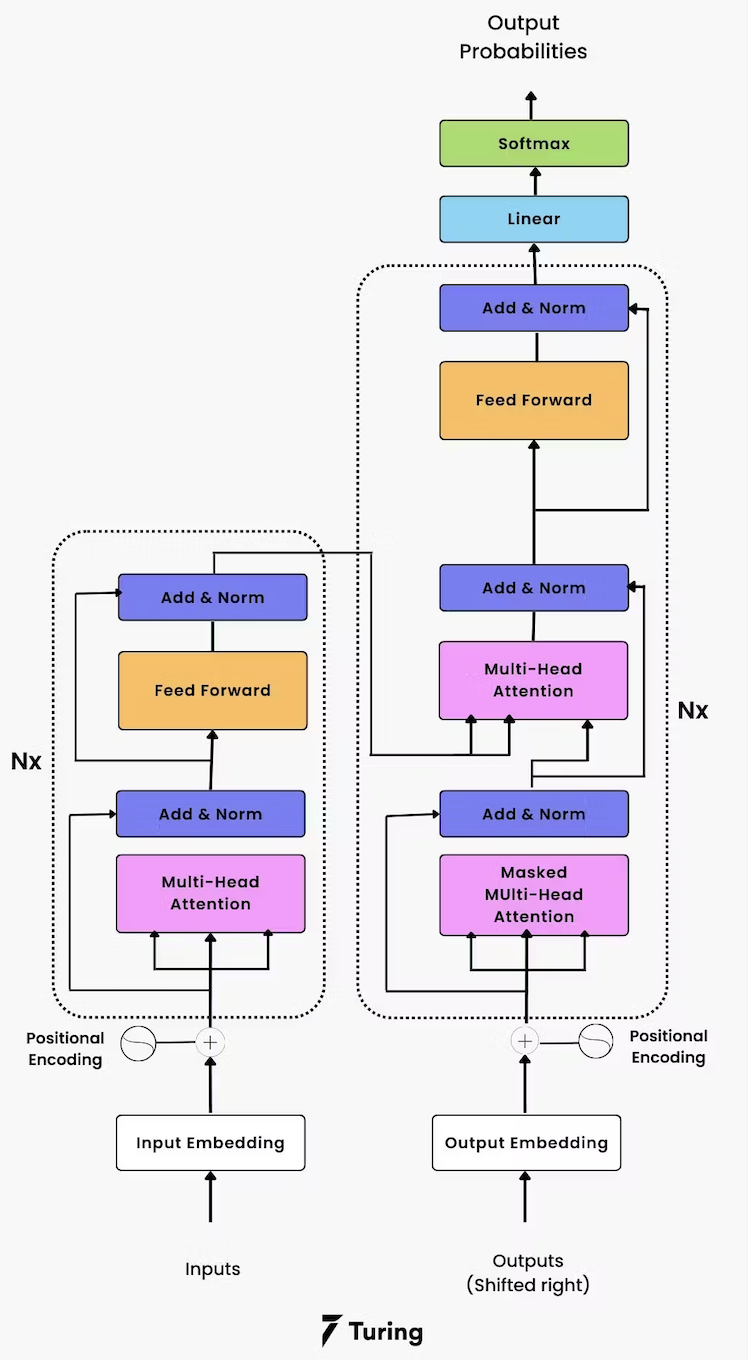

The last step now is doing the "computation/forwarding" part, where you compute everything over and over again (basically the arrows in the model above). I did this again following the video from Andrej Karpathy linked in the title. This was done in the SwiftWrite Textcompletion.py, I will just show the results in the Evaluation of the Model.

## Evaluation of the Model <a class="anchor" id="chapter6"></a>